# USE CASE DESCRIPTION:
    In competetve banking industry, customer has several choices of banks and services and may stop using product/service or switch to other banks. Banks need to determine customer's loyalty, churn risk and improve costomer retention. For this a model is required to predict/assess customer's churn risk.

## Customer Churn Prediction

We have used supervised learning models to identify customers who are likely to leave and it is a classification problem where we have to predict whether a customer would leave or not

## Import Library

In [118]:
#Data Processing
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from collections import Counter

#Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#ML Algorithms for Classification
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import  XGBClassifier

#Performance Evaluation
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.cross_validation import train_test_split

## Data

Data Source : https://github.com/var97/Customer-Churn-Problem/blob/master/Churn_Modelling.csv

In [119]:
data = pd.read_csv("Churn_Modelling.csv")

## Exploratory Data Analysis (EDA)

In [120]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfComplainsRaised,HasCrCard,RecentTransactions,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [121]:
data.shape

(10000, 14)

In [122]:
data.dtypes

RowNumber                 int64
CustomerId                int64
Surname                  object
CreditScore               int64
Geography                object
Gender                   object
Age                       int64
Tenure                    int64
Balance                 float64
NumOfComplainsRaised      int64
HasCrCard                 int64
RecentTransactions        int64
EstimatedSalary         float64
Exited                    int64
dtype: object

We see there are three format of data types:

    object: Categorical Variables. Categorical variables in our dataset are: Surname, Geography, Gender
    
    int64:  Integer variables. Integer variables in our dataset are: RowNumber, CustomerId, CreditScore, Age, Tenure, 
    NumOfComplainsRaised, HasCrCard, RecentTransactions, Exited
    
    float64: It represents the variable which have some decimal values involved. They are also numerical variables. 
    Numerical variables in our dataset are: Balance and EstimatedSalary


In [123]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfComplainsRaised',
       'HasCrCard', 'RecentTransactions', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [124]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfComplainsRaised,HasCrCard,RecentTransactions,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.011400,76485.889288,1.531700,0.704900,0.514700,100090.239881,0.221900
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892491,62397.405202,0.583634,0.456111,0.499809,57510.492818,0.415545
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


#### We have found that we have 10000 Instances, 13 independent variables and 1 target variable in the dataset.

# Data Pre-Processing

#### Missing value imputation - Observed no missing value!

In [125]:
data.isnull().any()

RowNumber               False
CustomerId              False
Surname                 False
CreditScore             False
Geography               False
Gender                  False
Age                     False
Tenure                  False
Balance                 False
NumOfComplainsRaised    False
HasCrCard               False
RecentTransactions      False
EstimatedSalary         False
Exited                  False
dtype: bool

#### Duplicate value check - Observed no duplicates !

In [126]:
data.duplicated().any()

False

#### Target Variable - Skewed Class Check - Observed 78% is the non churn rate and 22% is the churn rate

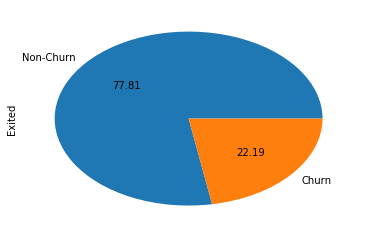

In [127]:
churncount = data["Exited"].value_counts()
labels = ['Non-Churn','Churn']
churncount.plot.pie(autopct = '%.2f',labels = labels)
plt.show()

##### Encoding logic to change object data type to numeric - Observed only Gender & Geography feature

In [128]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data.Gender.values)
data['Geography'] = le.fit_transform(data.Geography.values)

## Feature Engineering

Dropping the following features because our assumption is that these features should not affect churn.
    1) RowNumber
    2) Surname
    3) CustomerId

In [129]:
data = data.drop(["RowNumber","Surname","CustomerId"],axis = 1)
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfComplainsRaised', 'HasCrCard', 'RecentTransactions',
       'EstimatedSalary', 'Exited'],
      dtype='object')

## Visualization

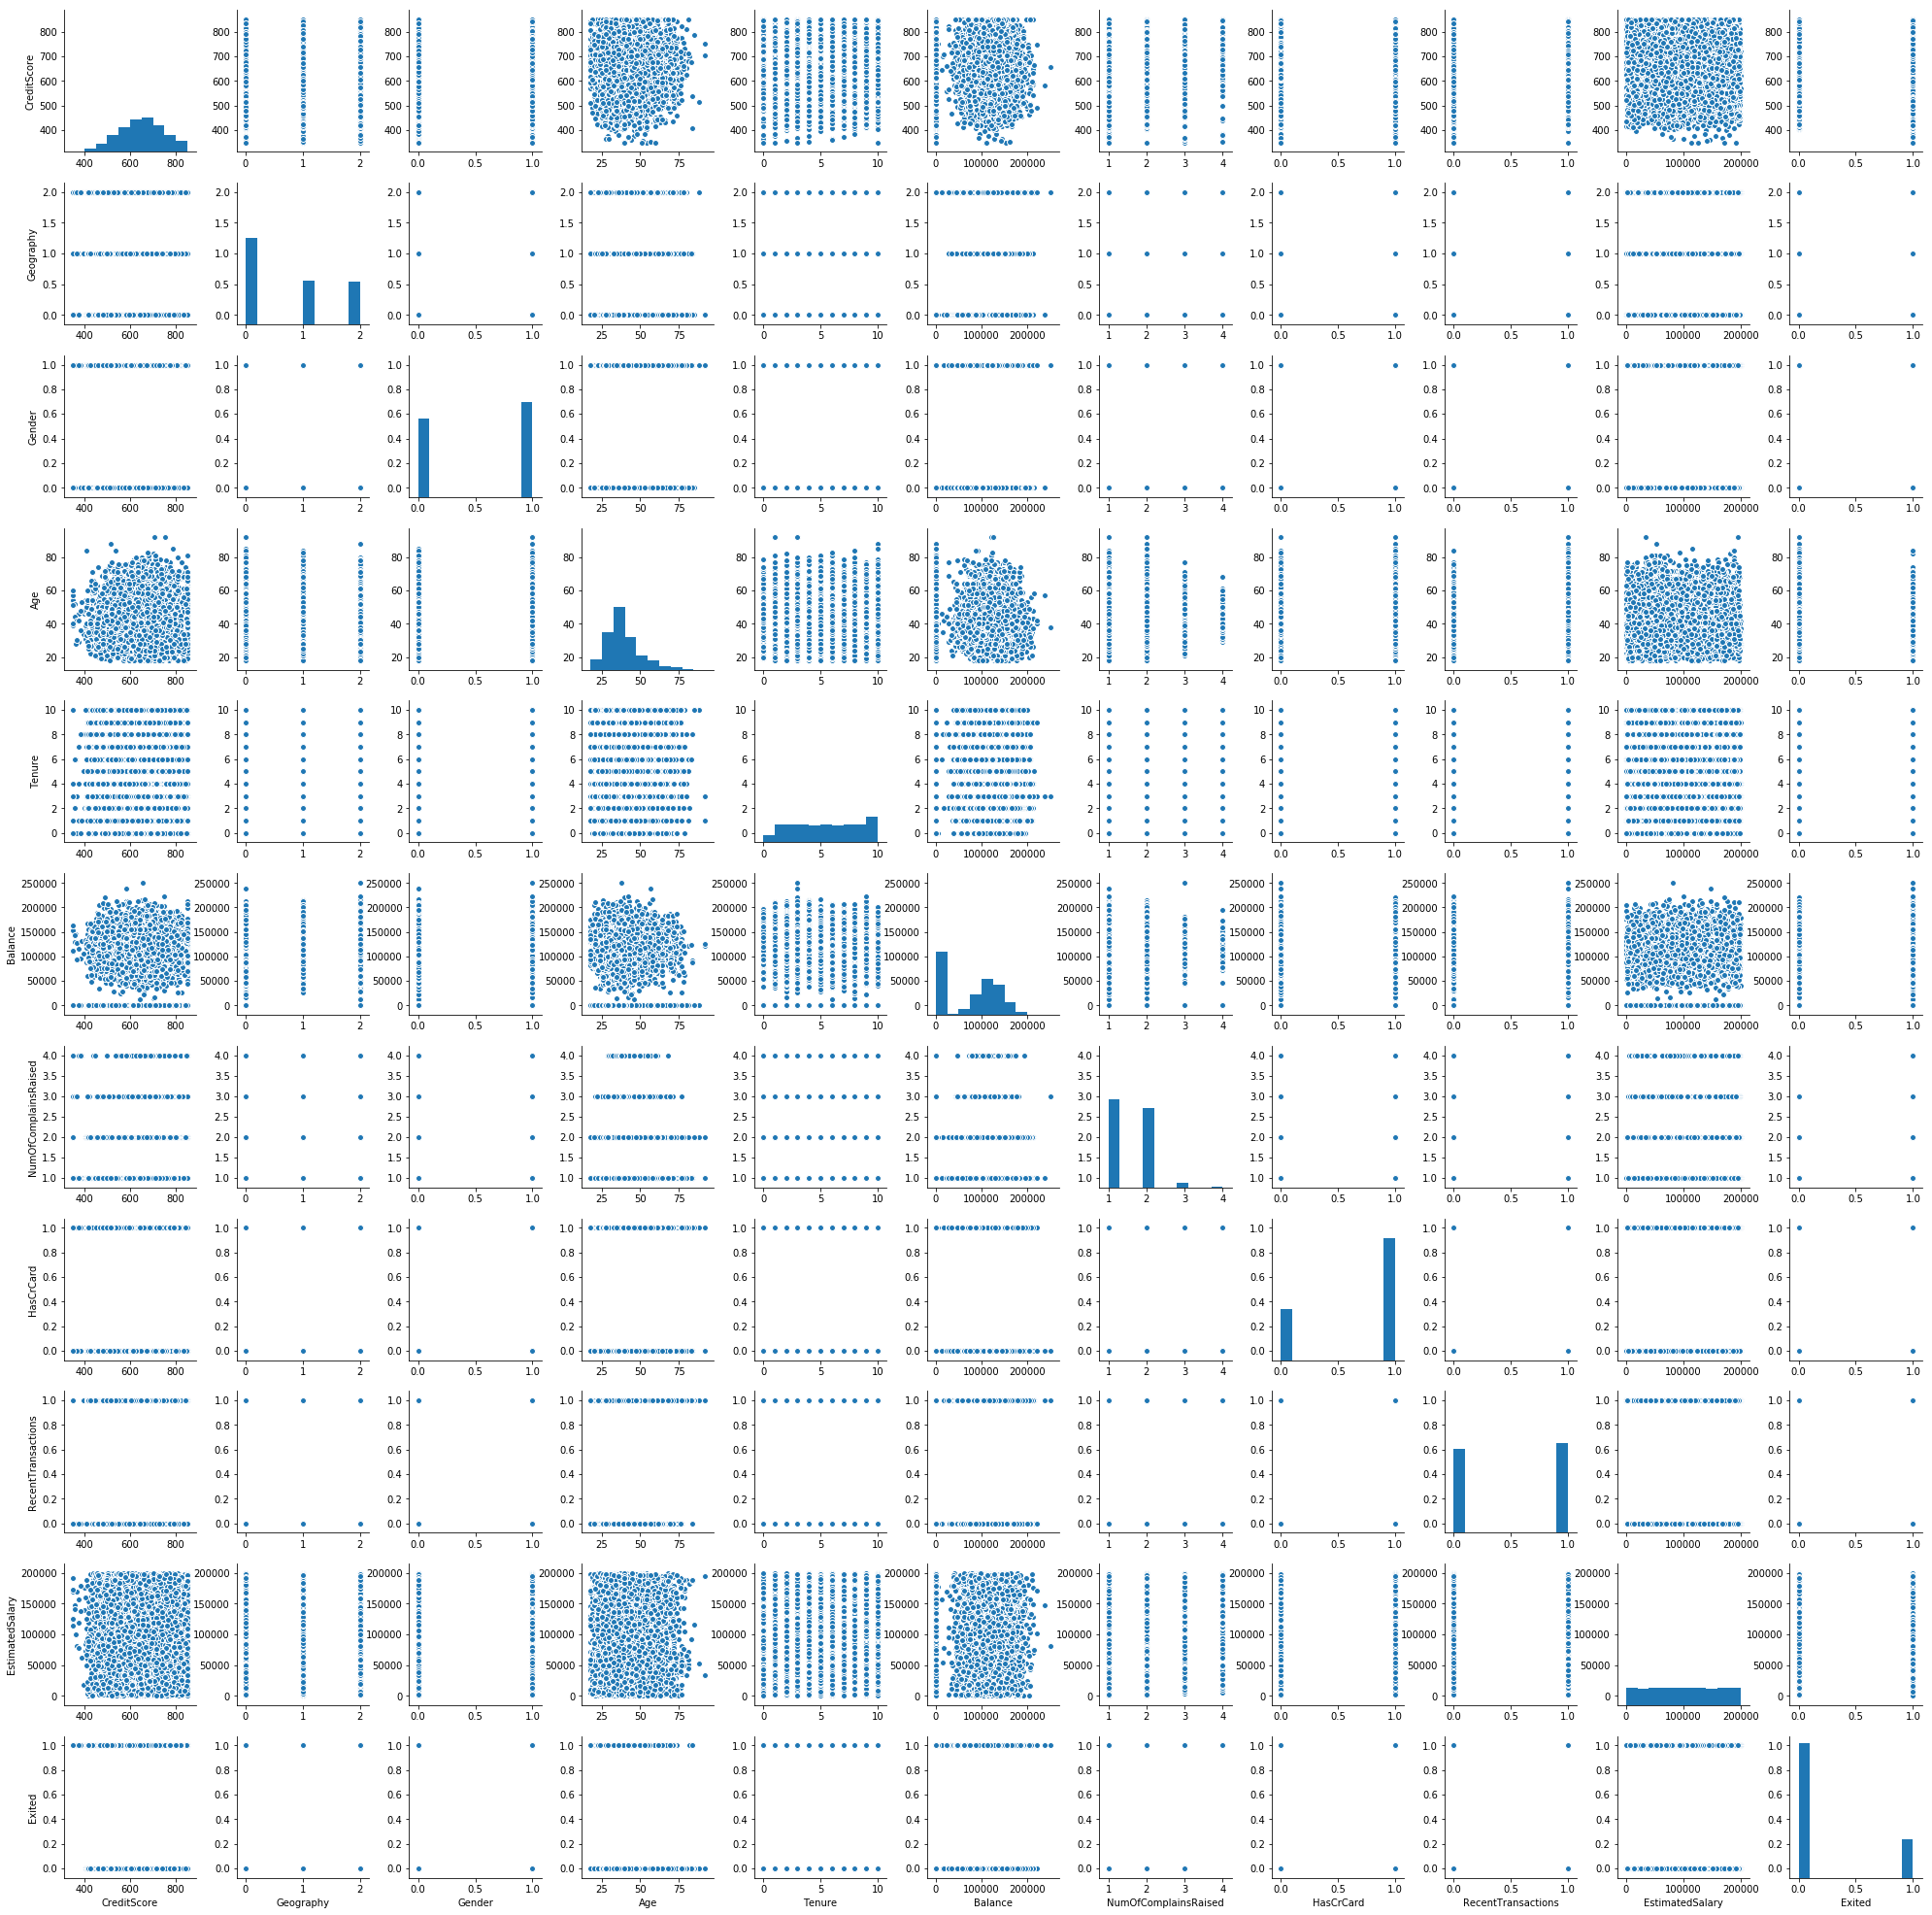

In [130]:
# To understand each feature
sns.pairplot(data)
# data.hist(figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000293C7845470>,
      dtype=object)

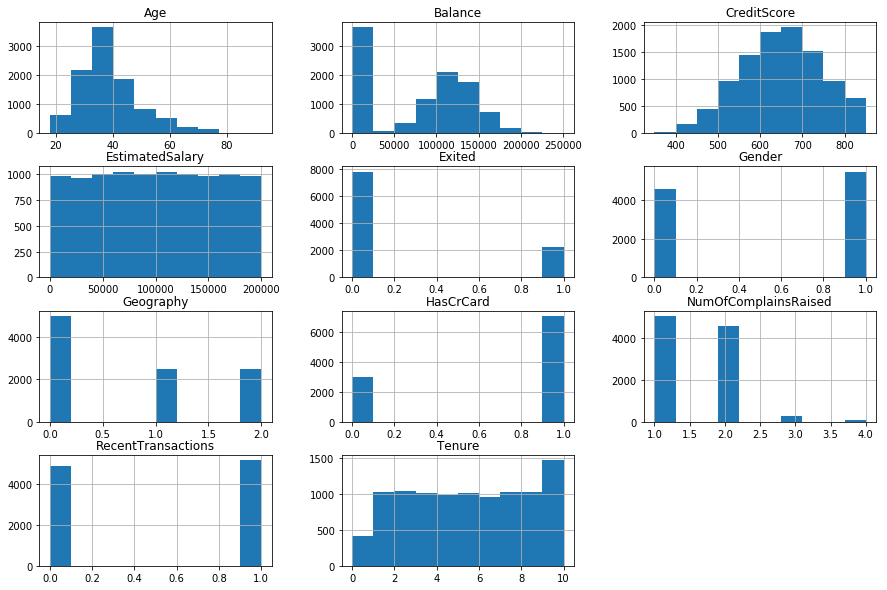

In [131]:
data.hist(figsize=(15,10))
# train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

It can be inferred from the above bar plots that:

    Around 40% of customers are in Age range 35-40 years
    55% customers in the dataset are male.
    Around 50% of the customers in the dataset are from France, Germany and Spain has 25% customers each.
    70% of customers have credit cards
    Very less Customers have 3 or more complains

## Correlation Matrix

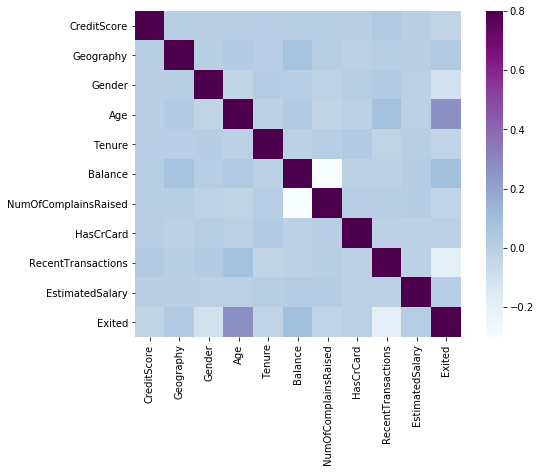

In [132]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

### Categorical Independent Variable vs Target Variable

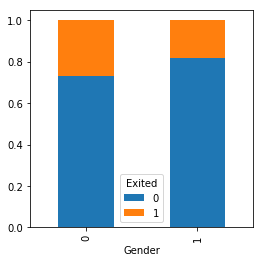

In [133]:
Gender=pd.crosstab(data['Gender'],data['Exited'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Proportion of Female customers is higher for the churn.

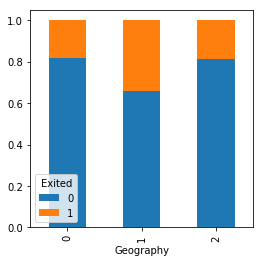

In [134]:
Geography=pd.crosstab(data['Geography'],data['Exited'])
# Geography.set_index("Exited")
Geography.div(Geography.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Proportion of churn in Germany is higher as compared to that in France or Spain.

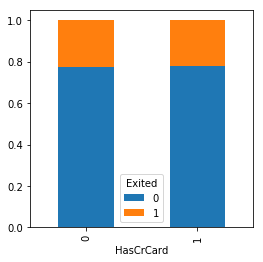

In [135]:
HasCrCard=pd.crosstab(data['HasCrCard'],data['Exited'])
HasCrCard.div(HasCrCard.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

There is nothing significant we can infer from HasCrCard vs Exited plot.

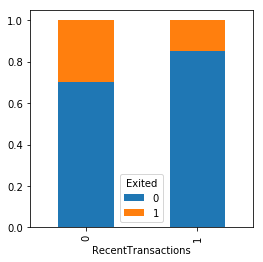

In [136]:
RecentTransactions=pd.crosstab(data['RecentTransactions'],data['Exited'])
RecentTransactions.div(RecentTransactions.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

It seems people with less recent transaction are more likely to churn.

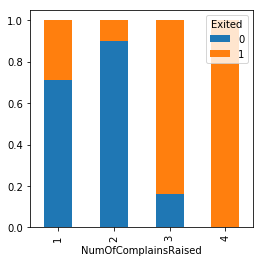

In [137]:
NumOfComplainsRaised=pd.crosstab(data['NumOfComplainsRaised'],data['Exited'])
NumOfComplainsRaised.div(NumOfComplainsRaised.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

### Numerical Independent Variable vs Target Variable

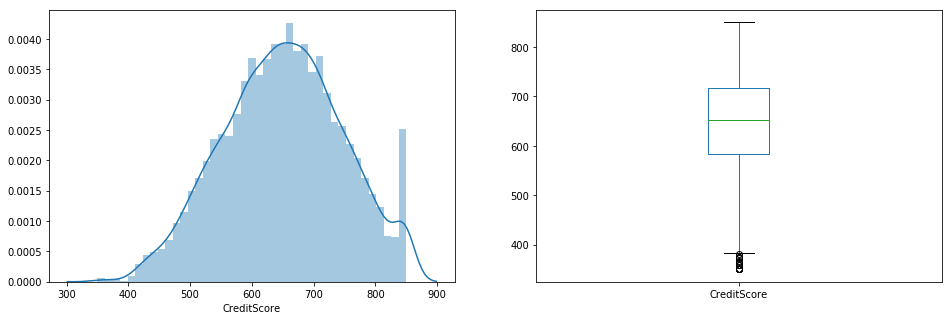

In [138]:
# Lets look at the distribution of CreditScore.
plt.figure(1)
plt.subplot(121)
sns.distplot(data['CreditScore']);

plt.subplot(122)
data['CreditScore'].plot.box(figsize=(16,5))

plt.show()

It can be inferred that most of the data is normally distributed.The boxplot confirms the presence of outliers/extreme values 

#### Outlier Treatment for 'CreditScore' Feature

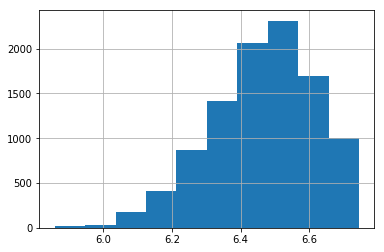

In [139]:
data['CreditScore'] = np.log(data['CreditScore'])
data['CreditScore'].hist(bins=10)
data['CreditScore'] = np.log(data['CreditScore'])

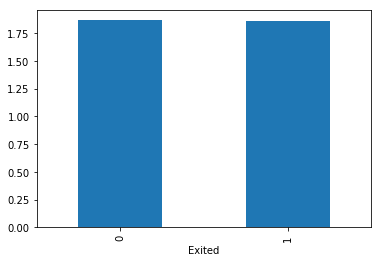

In [140]:
data.groupby('Exited')['CreditScore'].mean().plot.bar()

Here the y-axis represents the mean CreditScore. We don’t see any change in the mean income. So, let’s make bins for the CreditScore variable based on the values in it and analyze the corresponding churn status for each bin.

In [141]:
data['CreditScore_grp']=pd.cut(data['CreditScore'],bins=4)

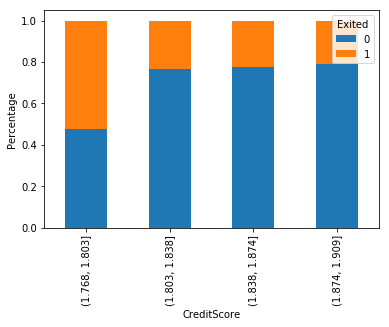

In [142]:
CreditScore_grp=pd.crosstab(data['CreditScore_grp'],data['Exited'])
CreditScore_grp.div(CreditScore_grp.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CreditScore')
P = plt.ylabel('Percentage')

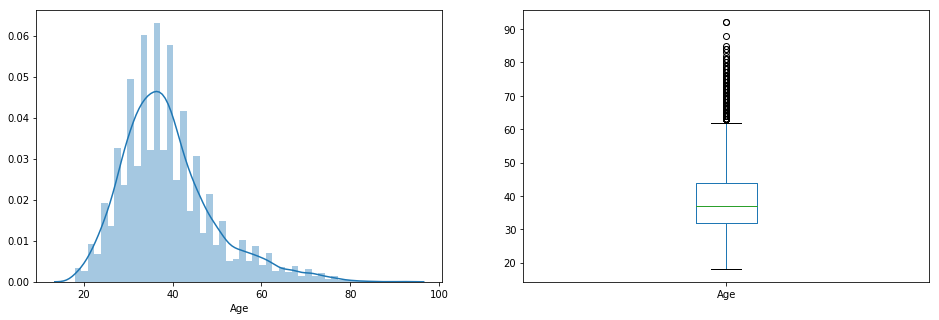

In [143]:
# Lets look at the distribution of Age first.
plt.figure(1)
plt.subplot(121)
sns.distplot(data['Age']);

plt.subplot(122)
data['Age'].plot.box(figsize=(16,5))

plt.show()

It can be inferred that most of the data is normally distributed.The boxplot confirms the presence of outliers/extreme values 

#### Outlier Treatment for 'Age' Feature

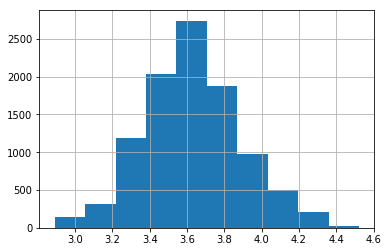

In [144]:
data['Age'] = np.log(data['Age'])
data['Age'].hist(bins=10)
data['Age'] = np.log(data['Age'])

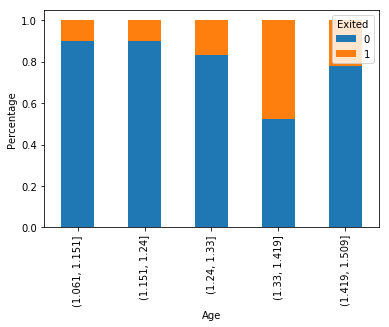

In [145]:
data['Age_grp']=pd.cut(data['Age'],bins=5)
Age_grp=pd.crosstab(data['Age_grp'],data['Exited'])
Age_grp.div(Age_grp.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Age')
P = plt.ylabel('Percentage')

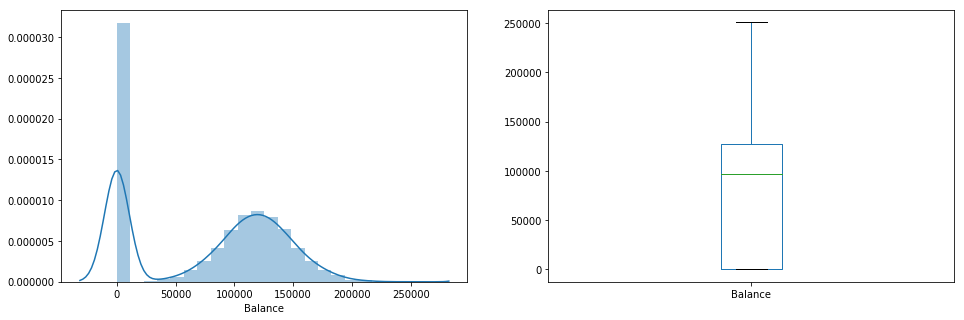

In [146]:
# Lets look at the distribution of Balance first.
plt.figure(1)
plt.subplot(121)
sns.distplot(data['Balance']);

plt.subplot(122)
data['Balance'].plot.box(figsize=(16,5))

plt.show()

The boxplot confirms the absence of outliers/extreme values for 'Balance' feature

In [147]:
bins=[0,50000,100000,150000,200000]
group=['Low','Average','High', 'Very high']
data['Balance_grp']=pd.cut(data['Balance'],bins,labels=group)

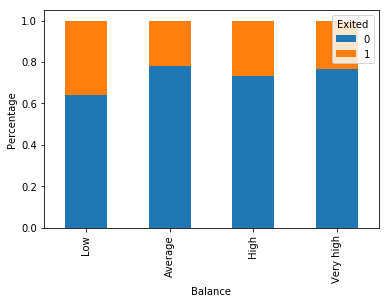

In [148]:
Balance_grp=pd.crosstab(data['Balance_grp'],data['Exited'])
Balance_grp.div(Balance_grp.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Balance')
P = plt.ylabel('Percentage')

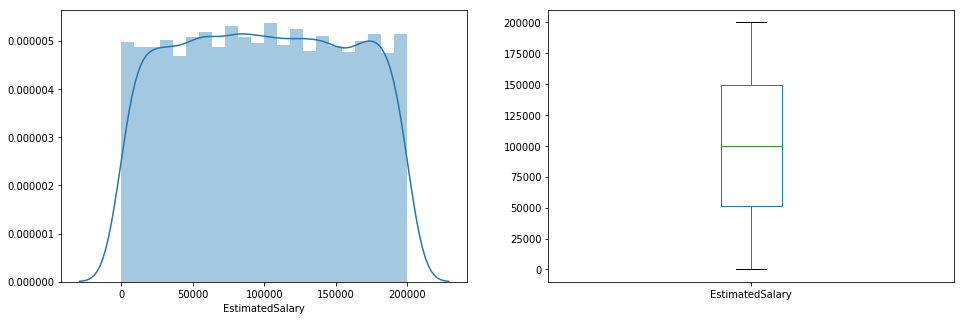

In [149]:
# Lets look at the distribution of EstimatedSalary.
plt.figure(1)
plt.subplot(121)
sns.distplot(data['EstimatedSalary']);

plt.subplot(122)
data['EstimatedSalary'].plot.box(figsize=(16,5))

plt.show()

The boxplot confirms the absence of outliers/extreme values for 'EstimatedSalary' feature

In [150]:
bins=[0,50000,100000,150000,200000]
group=['Low','Average','High', 'Very high']
data['EstimatedSalary_grp']=pd.cut(data['EstimatedSalary'],bins,labels=group)

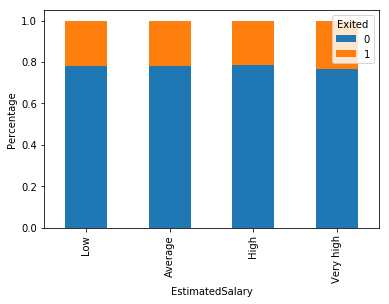

In [151]:
EstimatedSalary_grp=pd.crosstab(data['EstimatedSalary_grp'],data['Exited'])
EstimatedSalary_grp.div(EstimatedSalary_grp.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('EstimatedSalary')
P = plt.ylabel('Percentage')

There is nothing significant we can infer from EstimatedSalary vs Exited plot.

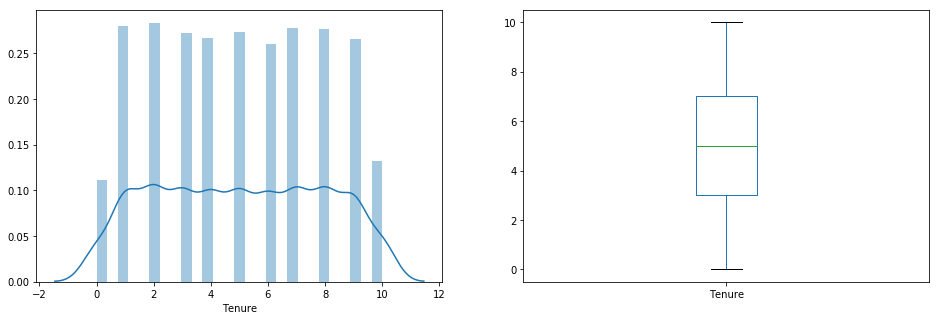

In [152]:
# Lets look at the distribution of Tenure.
plt.figure(1)
plt.subplot(121)
sns.distplot(data['Tenure']);

plt.subplot(122)
data['Tenure'].plot.box(figsize=(16,5))

plt.show()

The boxplot confirms the absence of outliers/extreme values for 'Tenure' feature

In [153]:
bins=[0,2,4,6,8,10]
group=['very Low','Low','Average','High', 'Very high']
data['Tenure_grp']=pd.cut(data['Tenure'],bins,labels=group)

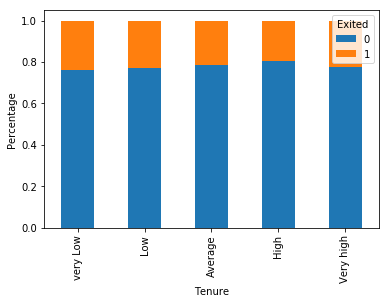

In [154]:
Tenure_grp=pd.crosstab(data['Tenure_grp'],data['Exited'])
Tenure_grp.div(Tenure_grp.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Tenure')
P = plt.ylabel('Percentage')

There is nothing significant we can infer from Tenure vs Exited plot.

In [155]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfComplainsRaised', 'HasCrCard', 'RecentTransactions',
       'EstimatedSalary', 'Exited', 'CreditScore_grp', 'Age_grp',
       'Balance_grp', 'EstimatedSalary_grp', 'Tenure_grp'],
      dtype='object')

In [156]:
data = data.drop(['HasCrCard','EstimatedSalary','Tenure','EstimatedSalary_grp','Tenure_grp','Balance_grp','CreditScore_grp','Age_grp'],axis=1)
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Balance',
       'NumOfComplainsRaised', 'RecentTransactions', 'Exited'],
      dtype='object')

#### After EDA, we concluded to remove "HasCrCard" feature from the dataset, since we observed that it did not play a role against the target variable (Exited/Churn)



# Model Selection

In [157]:
X = data.drop(['Exited'],axis=1)
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### K-fold Cross-Validation

We will compare 12 of the most popular classifiers and evaluate their performance using a stratified kfold cross validation procedure.

    Logistic Regression
    Linear Discriminant Analysis
    SVC
    KNN
    Random Forest (RFC)
    Decision Tree
    Extra Trees (ExtC)
    AdaBoost (Ada)
    Gradient Boosting (GBC)
    Multiple layer perceptron (neural network)
    XGBoost
    Naive Bayes


In [158]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

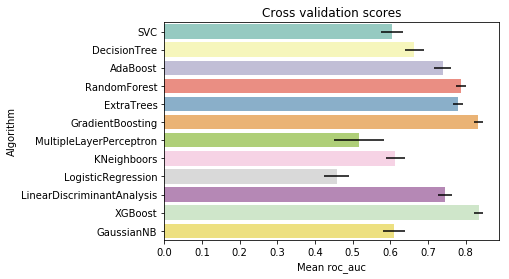

In [159]:
# Test differents algorithms 
random_state = 42
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(XGBClassifier(random_state=random_state))
classifiers.append(GaussianNB())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "roc_auc", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","XGBoost","GaussianNB"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean roc_auc")
g = g.set_title("Cross validation scores")

We decided to choose below algorthims for further fine-tuning as we observed relatively higher Mean ROC_AUC:

    RandomForest
    GradientBoosting
    XGBoost    


# Training the Model

In [169]:
clf = RandomForestClassifier(n_estimators=5)
clf.fit(X_train,y_train)

predictions_rf = clf.predict(X_test)
probs = clf.predict_proba(X_test)
score = clf.score(X_test,y_test)
print("Accuracy:", score)

Accuracy: 0.8186666666666667


In [161]:
clf = GradientBoostingClassifier()
clf.fit(X_train,y_train)

predictions_gb = clf.predict(X_test)
probs = clf.predict_proba(X_test)
score = clf.score(X_test,y_test)
print("Accuracy:", score)

Accuracy: 0.8526666666666667


In [171]:
clf = XGBClassifier(n_estimators=5, max_depth=3)
clf.fit(X_train,y_train)

predictions_xb = clf.predict(X_test)
probs = clf.predict_proba(X_test)
score = clf.score(X_test,y_test)
print("Accuracy:", score)

Accuracy: 0.842


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Performance Evaluation

In [163]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score

def cal_evaluation(classifier, cm, auc):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    f1 = 2 * precision * recall / (precision + recall)
    print(classifier)
    print("Accuracy is " + str(accuracy))
    print("Precision is " + str(precision))
    print("Recall is " + str(recall))
    print("F1 score is " + str(f1))
    print("ROC AUC is " + str(auc))

Random Forest
Accuracy is 0.8186666666666667
Precision is 0.6037344398340249
Recall is 0.4518633540372671
F1 score is 0.5168738898756661
ROC AUC is 0.6853968722648135


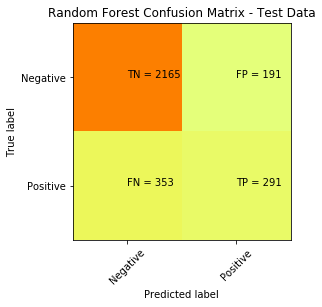

Gradient Boosting
Accuracy is 0.8526666666666667
Precision is 0.7744565217391305
Recall is 0.44254658385093165
F1 score is 0.5632411067193676
ROC AUC is 0.7036586909067901


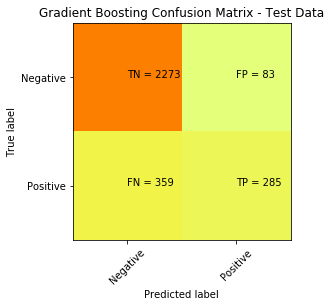

XGBoost
Accuracy is 0.842
Precision is 0.7724358974358975
Recall is 0.37422360248447206
F1 score is 0.50418410041841
ROC AUC is 0.6720438895274652


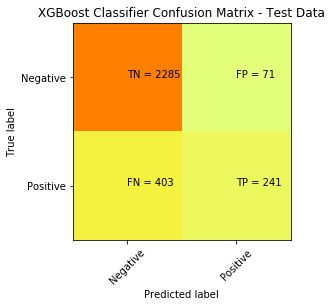

In [172]:
%matplotlib inline

# y = np.array(y)
# class_names = np.unique(y)
# print(class_names)



# ## Random Forest Confusion Matrix
cm = confusion_matrix(y_test, predictions_rf)

cal_evaluation("Random Forest", cm, roc_auc_score(y_test, predictions_rf))

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Random Forest Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()


# Gradient Boosting Confusion Matrix
cm = confusion_matrix(y_test, predictions_gb)

cal_evaluation("Gradient Boosting", cm, roc_auc_score(y_test, predictions_gb))

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Gradient Boosting Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

## XGBoost Classifier Confusion Matrix
cm = confusion_matrix(y_test, predictions_xb)

cal_evaluation("XGBoost", cm, roc_auc_score(y_test, predictions_xb))

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('XGBoost Classifier Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

## Hyperparameter Tuning Using GridSearch

### RandomForest

In [173]:
rf = RandomForestClassifier(n_estimators=20, criterion="entropy", random_state=42)
svm_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}
rf_param_grid = {
    "max_features": range(2,7),
    "min_samples_split": range(4,10),
    "min_samples_leaf": range(1,6),
}

grid_rf = GridSearchCV(rf, param_grid = rf_param_grid, cv=kfold, scoring="roc_auc", n_jobs=-1, verbose = 1)
grid_rf.fit(X_train,y_train)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  3.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': range(2, 7), 'min_samples_split': range(4, 10), 'min_samples_leaf': range(1, 6)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [174]:
rf_best = grid_rf.best_estimator_
# Best score
print('Best Score:', grid_rf.best_score_)
print('Best parameters set: \n', grid_rf.best_params_)

Best Score: 0.825578196005279
Best parameters set: 
 {'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 4}


In [175]:
y_pred_rf = rf_best.predict(X_test)
y_prob_rf = rf_best.predict_proba(X_test)[:,1]

### Gradient Boosting

In [176]:
gb = GradientBoostingClassifier(random_state=random_state)
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

grid_gb = GridSearchCV(gb,param_grid = gb_param_grid, cv=kfold, scoring="roc_auc", n_jobs= 4, verbose = 1)

grid_gb.fit(X_train,y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:  4.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'loss': ['deviance'], 'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.05, 0.01], 'max_depth': [4, 8], 'min_samples_leaf': [100, 150], 'max_features': [0.3, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [177]:
gb_best = grid_gb.best_estimator_
# Best score
print('Best Score:', grid_gb.best_score_)
print('Best parameters set: \n', grid_gb.best_params_)

Best Score: 0.8363092333971659
Best parameters set: 
 {'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 4, 'max_features': 0.1, 'min_samples_leaf': 100, 'n_estimators': 300}


In [178]:
y_pred_gb = gb_best.predict(X_test)
y_prob_gb = gb_best.predict_proba(X_test)[:,1]

### XGBoost

In [179]:
xgb = GradientBoostingClassifier(random_state=random_state)

#xgb.get_params().keys()
xgb_param_grid = {
    'learning_rate': [0.025,0.05,0.1], 
    'max_depth': [3,4,5],
    'subsample': [0.25,0.5,1.0]
}
grid_xgb = GridSearchCV(xgb, param_grid = xgb_param_grid, cv=kfold, scoring="roc_auc", n_jobs= 4, verbose = 1)

grid_xgb.fit(X_train,y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   50.2s
[Parallel(n_jobs=4)]: Done 270 out of 270 | elapsed:  1.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'learning_rate': [0.025, 0.05, 0.1], 'max_depth': [3, 4, 5], 'subsample': [0.25, 0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [180]:
xgb_best = grid_xgb.best_estimator_
# Best score
print('Best Score:', grid_xgb.best_score_)
print('Best parameters set: \n', grid_xgb.best_params_)

Best Score: 0.8376368278964825
Best parameters set: 
 {'learning_rate': 0.05, 'max_depth': 4, 'subsample': 0.5}


In [181]:
y_pred_xgb = xgb_best.predict(X_test)
y_prob_xgb = xgb_best.predict_proba(X_test)[:,1]



# Comparing Plot learning curves of the Best Models


Learning curves are a good way to see the overfitting effect on the training set and the effect of the training size on the accuracy.

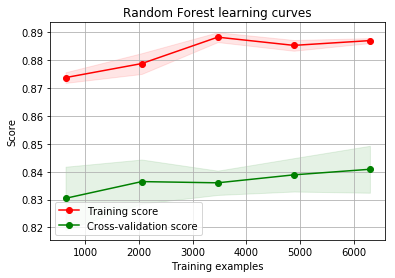

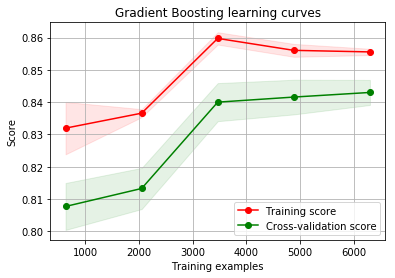

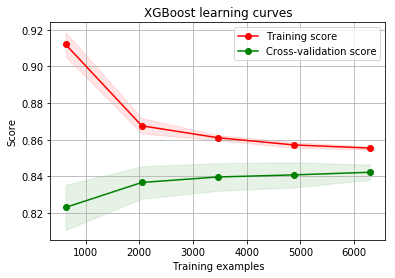

In [182]:
# Plot learning curves
#grid_svm, grid_rf, grid_gb, grid_knn, grid_lr, grid_xgb

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(grid_rf.best_estimator_,"Random Forest learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_gb.best_estimator_,"Gradient Boosting learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_xgb.best_estimator_,"XGBoost learning curves",X_train,y_train,cv=kfold)

#### We see that Random Forest tend to overfit the training set. 

#### Relative to GradientBoosting, XGBoost classifiers seems to better generalize the prediction since the training and cross-validation curves are close together.

## Performance Evaluation after Paremeter Tuning

### Calculate Confusion Matrix (Precision, Recall, Accuracy)

Random Forest
Accuracy is 0.8536666666666667
Precision is 0.7777777777777778
Recall is 0.44565217391304346
F1 score is 0.5666337611056269
ROC AUC is 0.7054237100465047


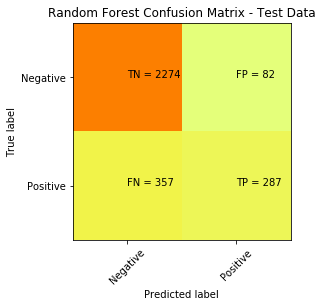

Gradient Boosting
Accuracy is 0.8486666666666667
Precision is 0.7581521739130435
Recall is 0.4332298136645963
F1 score is 0.5513833992094862
ROC AUC is 0.830333086397621


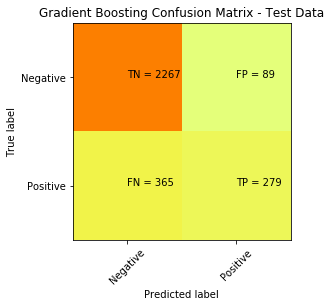

XGBoost
Accuracy is 0.852
Precision is 0.773224043715847
Recall is 0.4394409937888199
F1 score is 0.5603960396039604
ROC AUC is 0.7021058958757342


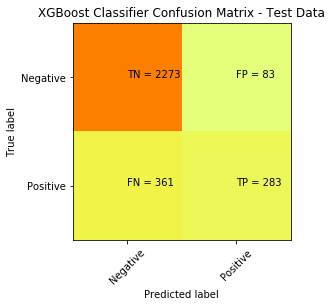

In [183]:
%matplotlib inline

# y = np.array(y)
# class_names = np.unique(y)
# print(class_names)

## Random Forest Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

cal_evaluation("Random Forest", cm, roc_auc_score(y_test, y_pred_rf))

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Random Forest Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

## Gradient Boosting Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gb)

cal_evaluation("Gradient Boosting", cm, roc_auc_score(y_test, y_prob_gb))

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Gradient Boosting Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

## XGBoost Classifier Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)

cal_evaluation("XGBoost", cm, roc_auc_score(y_test, y_pred_xgb))

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('XGBoost Classifier Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

#### Gradient Boosting
Accuracy is 84.8%

#### Random Forest
Accuracy is 85.1%

#### XGBoost Classifier
Accuracy is 85.15%


# Conclusion


#### Thus we will use XGBoost as our Prediction Model

## Feature importance of XGBoost Classifier

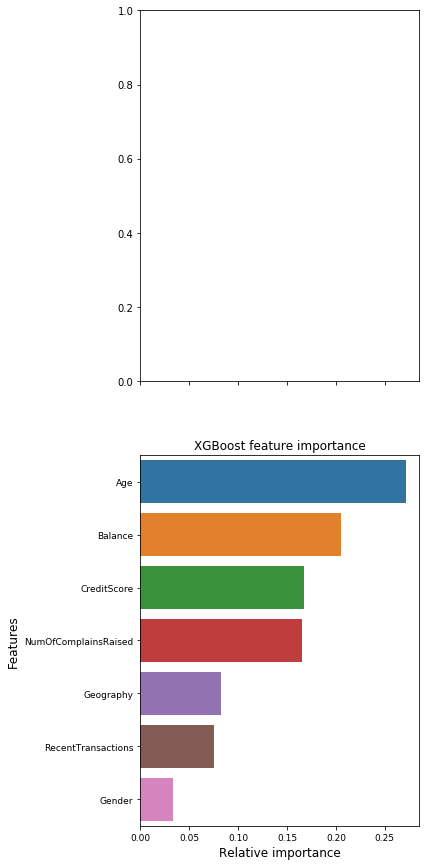

In [184]:
#nrows = ncols = 2
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(5,15))

names_classifiers = [("XGBoost", xgb_best)]

nclassifier = 0
# for row in range(nrows):
name = names_classifiers[nclassifier][0]
classifier = names_classifiers[nclassifier][1]
indices = np.argsort(classifier.feature_importances_)[::-1][:40]
g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[1])
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title(name + " feature importance")
nclassifier += 1

## Thus we see the most informative feature is Age.

## Other important features are Balance, NumofComplaintsRaised, Estimated Salary & Credit Score

## Thus we can conclude that Bank has to monitor those customers that fall in the risk range of these features and try to look for reducing the churn rate by providing additional services.

## As mentioned above , we can use XGBoost algorithm to predict the customers that has high rate for churn

### Customers that has high probabilty to churn

In [188]:
X_test["prob_true"] = y_prob_xgb
risky = X_test[X_test["prob_true"] >0.9]
print(risky.head(100)[["prob_true"]])

      prob_true
2750   0.930831
7487   0.915490
3032   0.909515
764    0.932257
7457   0.941509
416    0.909910
7436   0.922072
7155   0.959980
7590   0.936269
8706   0.904319
1631   0.945942
3204   0.932665
8683   0.930144
3130   0.919034
2168   0.928176
3251   0.924944
2614   0.980544
8762   0.929788
1254   0.911063
8103   0.938281
376    0.948081
2473   0.943669
2542   0.901052
6255   0.967682
743    0.900743
2777   0.936130
6221   0.907341
2210   0.913490
5950   0.978379
871    0.935939
...         ...
5922   0.907250
467    0.940779
538    0.902395
5137   0.920576
4463   0.925777
5570   0.921400
6911   0.968050
7533   0.950609
5363   0.935223
1922   0.913270
4889   0.918385
2115   0.945257
1962   0.949072
4174   0.915694
1005   0.961173
8471   0.907437
7116   0.901897
7248   0.958755
4842   0.949641
7025   0.909343
6000   0.906495
880    0.924163
8923   0.973068
1193   0.924768
70     0.970641
544    0.935637
9106   0.945346
5337   0.971918
420    0.938965
8493   0.930765

[65 row

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Developed by Jayalakshmi, Abhiraam and Sowyma

References
1. Paper by Pimentel, M.A.F., Clifton, D.A., Clifton, L., Tarassenko, L., 2014. A review of novelty detection. Signal Processing.
2. https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/
3. https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
4. http://stamfordresearch.com/outlier-removal-in-python-using-iqr-rule/



In [185]:
...

Ellipsis